# Visualization

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import patsy
import math
import plotly.plotly as pltly
import plotly.figure_factory as ff

# plotly gives annoying warnings about RAM usage when generating the large maps
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
%matplotlib inline

## Import our cleaned DataFrame

In [27]:
# Read the DF created from the feature_selection notebook
counties = pd.read_pickle('counties_df.pkl')

## Heatmap of Drug Overdose Mortality Rate over all US Counties 

In [3]:
fips = counties.index.tolist()
values = counties['Drug Overdose Mortality Rate'].tolist()

In [4]:
fig = ff.create_choropleth(
    fips=fips, 
    values=values, 
    show_hover=True,
    title='USA Counties by Drug Overdose Mortality Rate',
)
pltly.iplot(fig, filename='drug_od_rate_choropleth')

The draw time for this plot will be slow for clients without much RAM.


### Compare to our modeled Overdose Mortality Rates

## Looking at significant features vary with drug mortality
Now that we have seen which features are significant in modeling our target of Drug Overdose Rate, attempt to visualize the the values of the features

### Our intuitive features

In [28]:
features = ['% Unemployed', 'Household Income', 'Graduation Rate', '% Rural', 'HIV Prevalence Rate', '% Frequent Mental Distress', '% Excessive Drinking']

In [29]:
counties['Drug Overdose Mortality Rate Quartiles'] = pd.qcut(counties['Drug Overdose Mortality Rate'], 4, labels=False)

In [30]:
quantile_df = counties[['Drug Overdose Mortality Rate Quartiles']]
for feature in features:
    feature_deciles = '{} Deciles'.format(feature)
    quantile_df[feature_deciles] = pd.qcut(counties[feature], 10, labels=False)

In [47]:
q_groups = quantile_df.groupby('Drug Overdose Mortality Rate Quartiles')

q1 = q_groups.get_group(0).drop(columns=['Drug Overdose Mortality Rate Quartiles'])
q2 = q_groups.get_group(1).drop(columns=['Drug Overdose Mortality Rate Quartiles'])
q3 = q_groups.get_group(2).drop(columns=['Drug Overdose Mortality Rate Quartiles'])
q4 = q_groups.get_group(3).drop(columns=['Drug Overdose Mortality Rate Quartiles'])

### Compare Quartiles
It will be the most interesting to compare Q1 and Q4 (the lowest and highest)

#### Q1

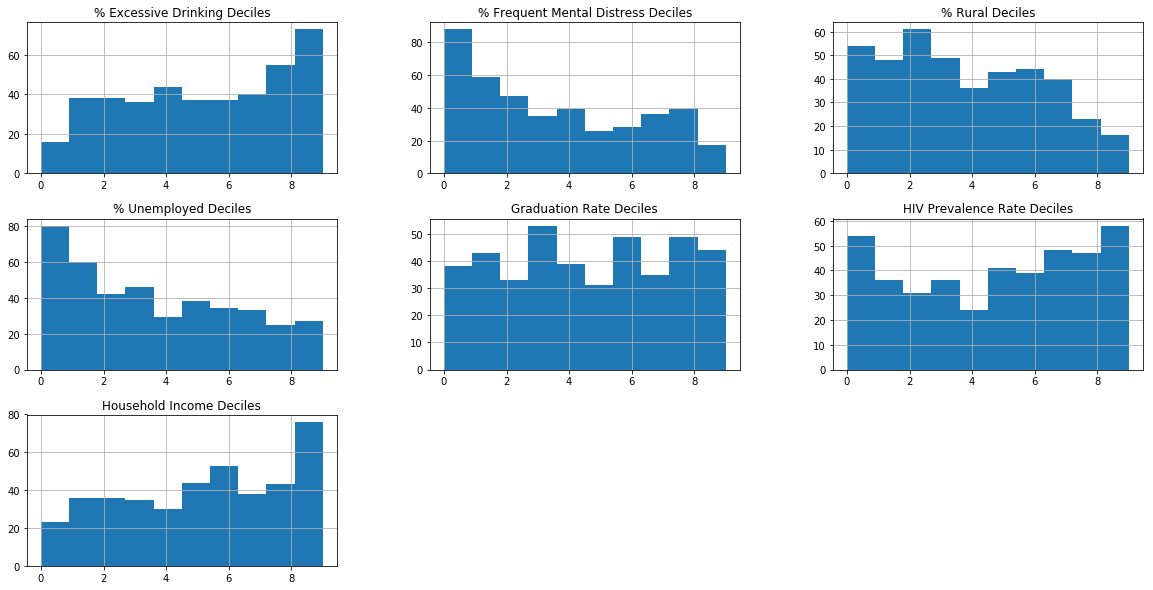

In [48]:
q1.hist(figsize=(20,10))
plt.show()

#### Q4

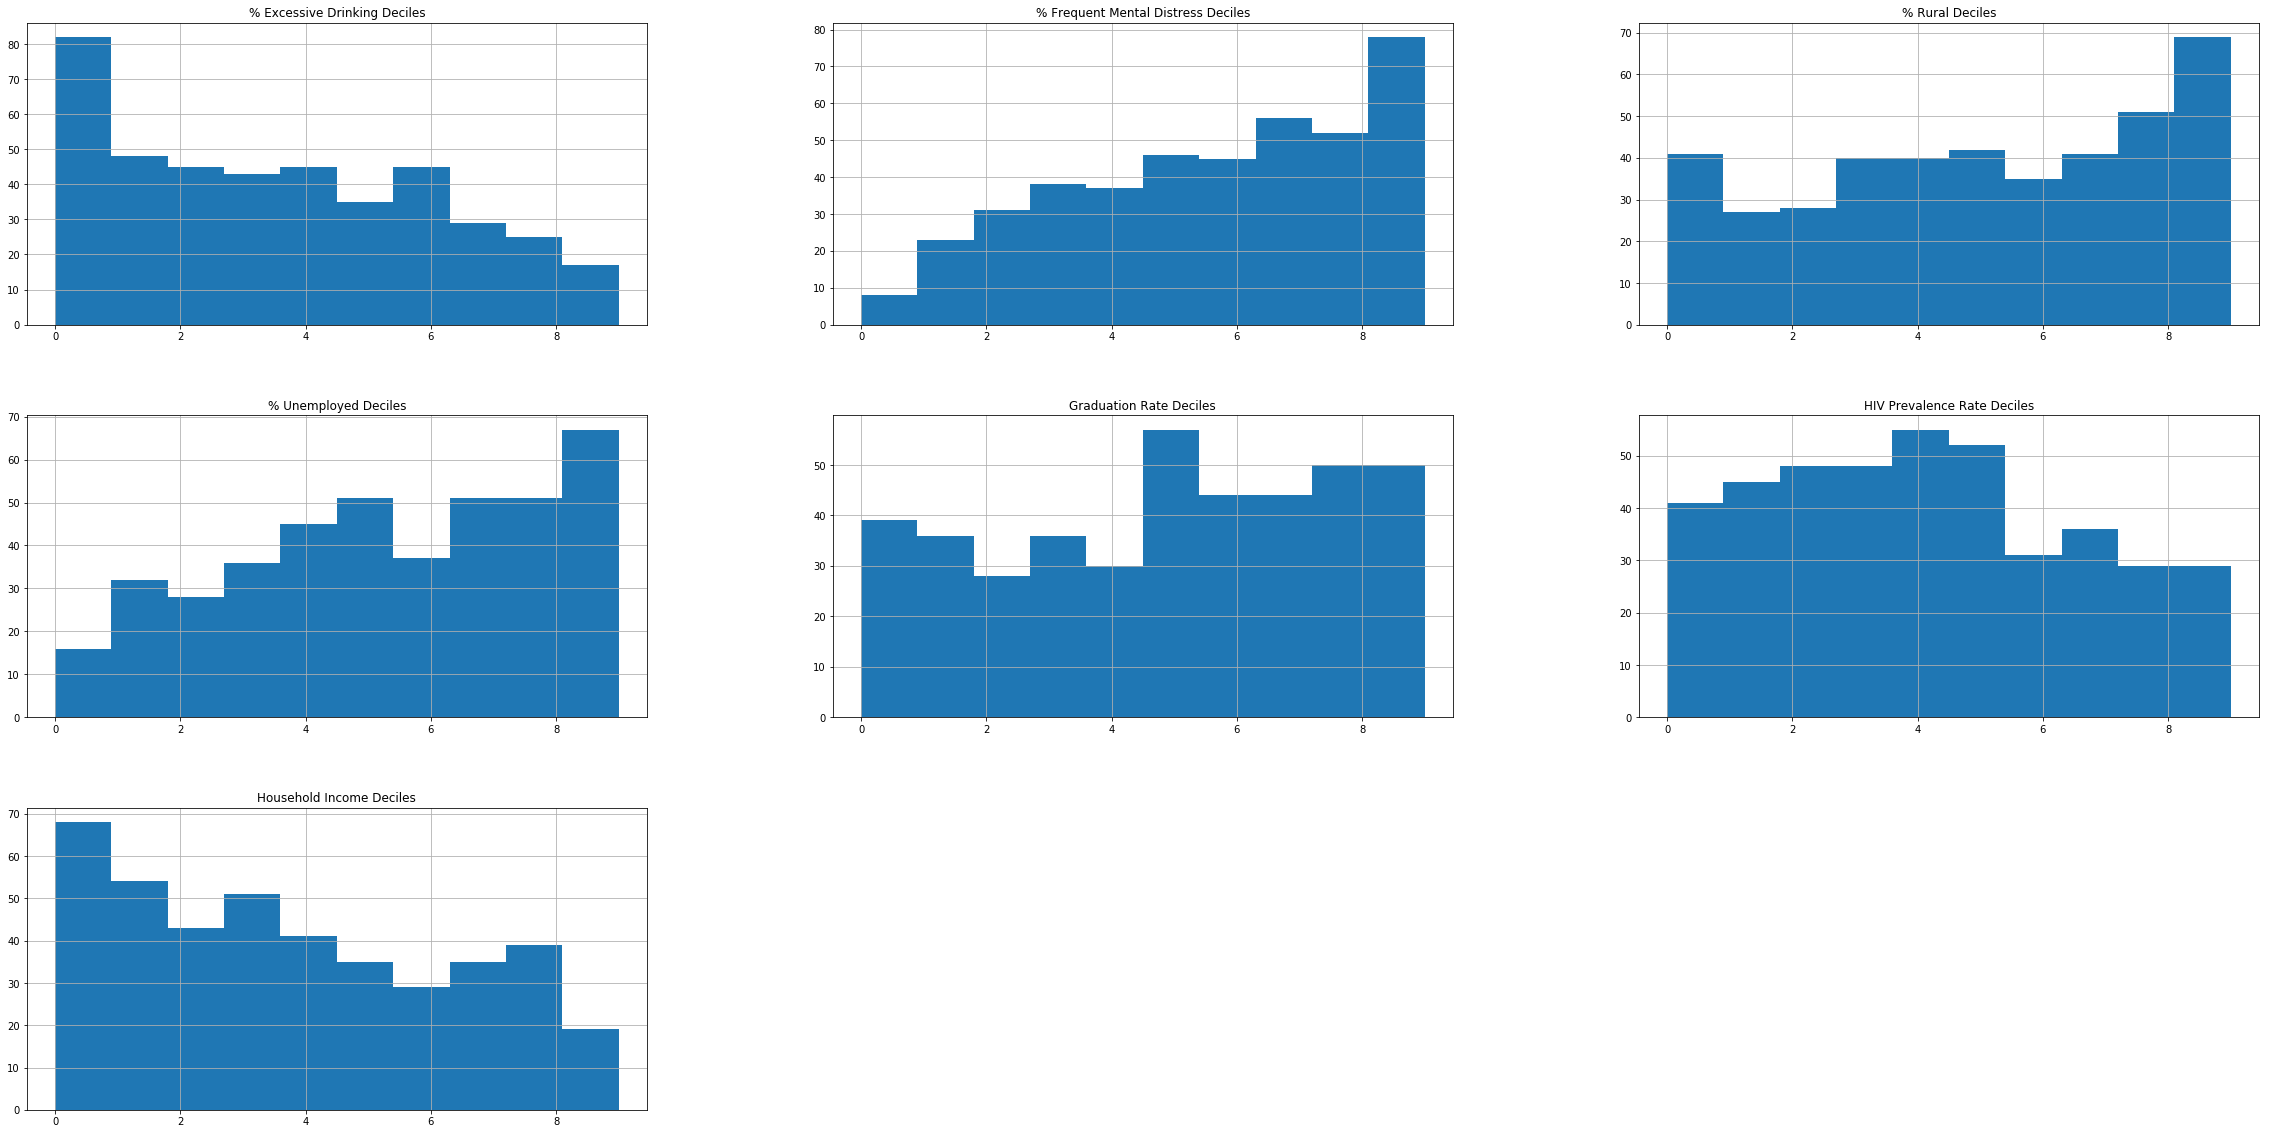

In [54]:
q4.hist(figsize=(20,10))
plt.show()